In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pylab as plt

from vision.spike_tools.pattern import pattern_generator as pat_gen
from vision.spike_tools.vis import vis_tools as spk_vis
from vision.sim_tools.connectors import standard_connectors as std_conn

from pyNN import nest as sim
# from pyNN import spiNNaker as sim

if sim.__name__ == 'pyNN.spiNNaker':
    import spynnaker_extra_pynn_models as q



In [2]:
def set_in_pop(sim, single_patt, num_neurons, w2s=2.):
#     print("Setting-up Input population...")

    cell = sim.IF_curr_exp
    params = { 'cm': 0.35,  # nF
               'i_offset': 0.0,
               'tau_m': 4.0,
               'tau_refrac': 1.0,
               'tau_syn_E': 1.,
               'tau_syn_I': 10.,
               'v_reset': -70.6,
               'v_rest': -65.0,
               'v_thresh': -50.
             }
    dmy_pops = []
    dmy_prjs = []
    
    if sim.__name__ == 'pyNN.nest':
        in_pop = sim.Population(num_neurons, cell, params, label='input pattern')
        for i in range(num_neurons):
            dmy_pops.append( sim.Population(1, sim.SpikeSourceArray, 
                                            {'spike_times': single_patt[i]},
                                            label='dummy neuron %d'%i) )
            conn = [(0, i, w2s, 1)]
            dmy_prjs.append(sim.Projection(dmy_pops[i], in_pop,
                                           sim.FromListConnector(conn),
                                           target='excitatory'))

    else:
        in_pop = sim.Population(num_neurons, sim.SpikeSourceArray,
                                {'spike_times': single_patt},
                                label='input population')

    return in_pop, dmy_pops, dmy_prjs

def plot_sim_spikes(spikes, pops):
    sizes = [pops[k].size for k in pops]
    max_size = np.max(sizes)
    fig = plt.figure(figsize=(10, 9))
    f = 1
    for i in spikes:
        if i == 'inh':
            continue
        ax = plt.subplot(2, 1, f)
        f += 1
        spk_vis.plot_output_spikes(spikes[i], plotter=ax)
        ax.set_title(i)
        ax.set_ylim([-1, max_size])
        ax.set_xlim([-1, run_time + 1 ])
    plt.show()
    
def plot_weight_diff(start_w, new_w, a_plus, a_minus, w2s):
    s_w_r = start_w.reshape(new_w.shape)
    dw = new_w - s_w_r
    max_dw = max(np.abs(a_plus), np.abs(a_minus))
    fig = plt.figure()
    ax = plt.subplot(1, 3, 1)
    spk_vis.my_imshow(ax, s_w_r, vmin=0, vmax=w2s)
    ax = plt.subplot(1, 3, 2)
    spk_vis.my_imshow(ax, new_w, vmin=0, vmax=w2s)
    ax = plt.subplot(1, 3, 3)
    spk_vis.my_imshow(ax, dw, vmin=-max_dw, vmax=max_dw)
    plt.colorbar()
    plt.show()

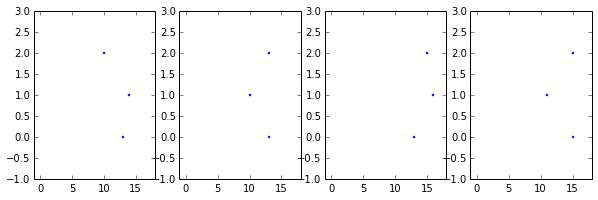

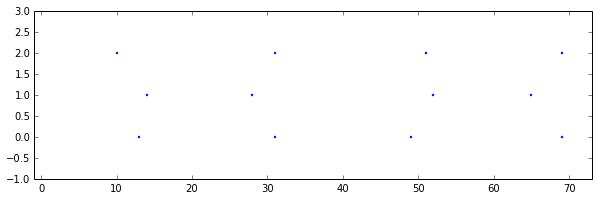

In [3]:
num_in = 3
num_hid = 10

t_step = 2.
start_t = 10.
twin = start_t + t_step*num_in + 2
patts = []

patts.append(pat_gen.random_pattern(num_in, start_time=start_t, 
                                    end_time=start_t+t_step*num_in, 
                                    seed=1))

patts.append(pat_gen.random_pattern(num_in, start_time=start_t, 
                                    end_time=start_t+t_step*num_in, 
                                    seed=2))

patts.append(pat_gen.random_pattern(num_in, start_time=start_t, 
                                    end_time=start_t+t_step*num_in, 
                                    seed=23))

patts.append(pat_gen.random_pattern(num_in, start_time=start_t, 
                                    end_time=start_t+t_step*num_in, 
                                    seed=13))

# patts.append(pat_gen.diagonal(num_in, time_step=t_step, 
#                               directions={pat_gen.HORZ: pat_gen.LEFT_TO_RIGHT,
#                                           pat_gen.VERT: pat_gen.TOP_TO_BOTTOM},
#                               start_time=start_t))

# patts.append(pat_gen.diagonal(num_in, time_step=t_step, 
#                               directions={pat_gen.HORZ: pat_gen.LEFT_TO_RIGHT,
#                                           pat_gen.VERT: pat_gen.BOTTOM_TO_TOP},
#                               start_time=start_t))

fig = plt.figure(figsize=(10, 3))
for i in range(len(patts)):
    ax = plt.subplot(1, len(patts), i+1)
    spk_vis.plot_spikes(patts[i], plotter=ax)
    ax.set_ylim([-1, num_in ])
    ax.set_xlim([-1, twin ])
plt.show()

single_patt = [[] for i in range(num_in)]
for i in range(len(patts)):
    single_patt[:] = pat_gen.merge_patterns( single_patt, 
                                             pat_gen.move_in_time(i*twin, patts[i]) )

fig = plt.figure(figsize=(10, 3))
ax = plt.subplot(1, 1, 1)
spk_vis.plot_spikes(single_patt, plotter=ax)
ax.set_ylim([-1, num_in ])
ax.set_xlim([-1, twin*len(patts) + 1 ])
plt.show()


#S I M U L A T I O N

In [4]:
w2s = 2.1
start_w = (w2s)#/num_in)*0.9
np.random.seed(1)
w_in2hid = np.random.random(size=(num_in*num_hid))*start_w
# in2hid = std_conn.all2all(num_in, num_hid, w_in2hid)
hid2inh, inh2hid = std_conn.wta_interneuron(num_hid, ff_weight=w2s, fb_weight=-w2s)

Cycle 0
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


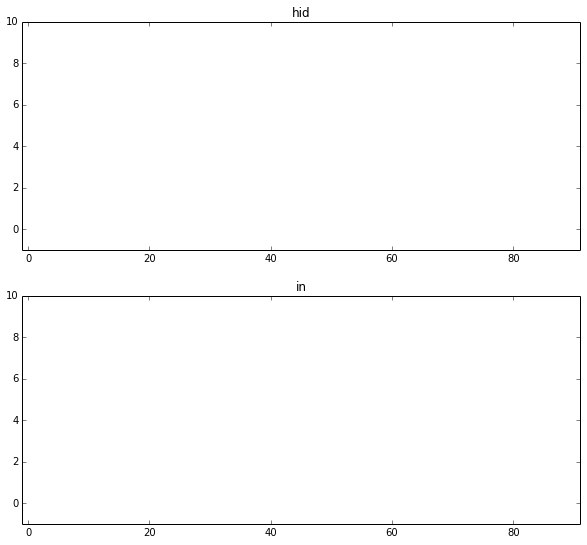

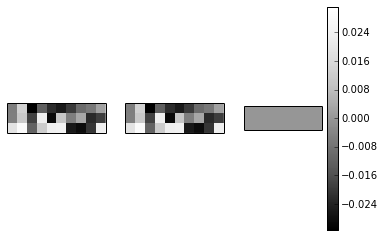

Cycle 1
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


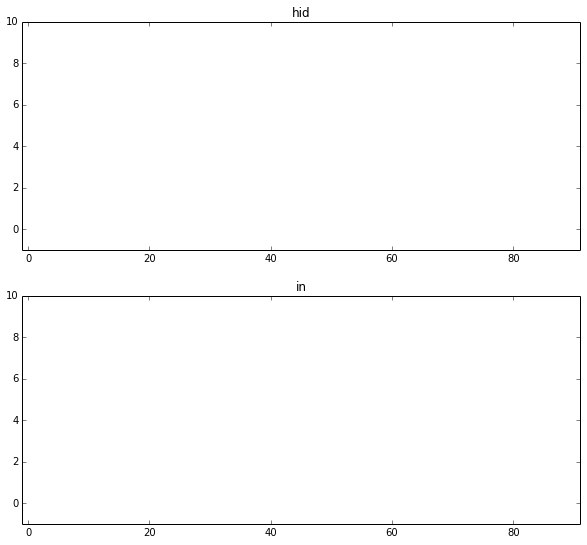

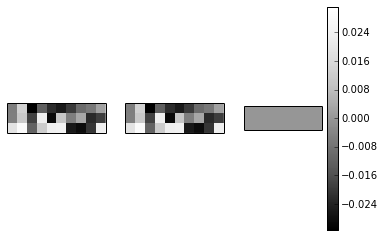

Cycle 2
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


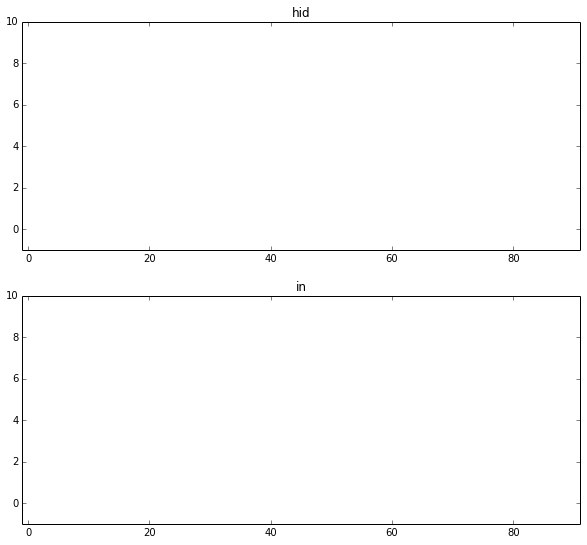

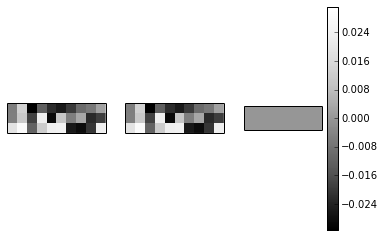

Cycle 3
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


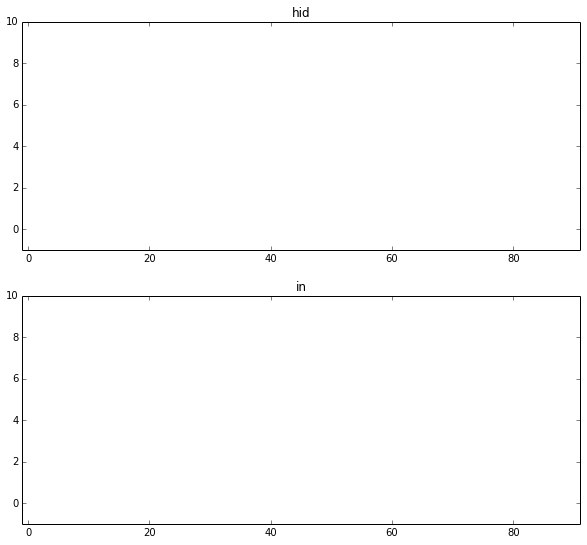

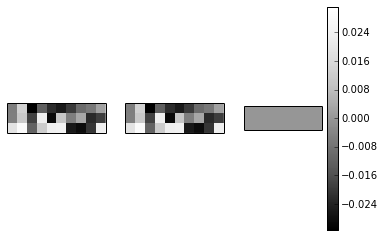

Cycle 4
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


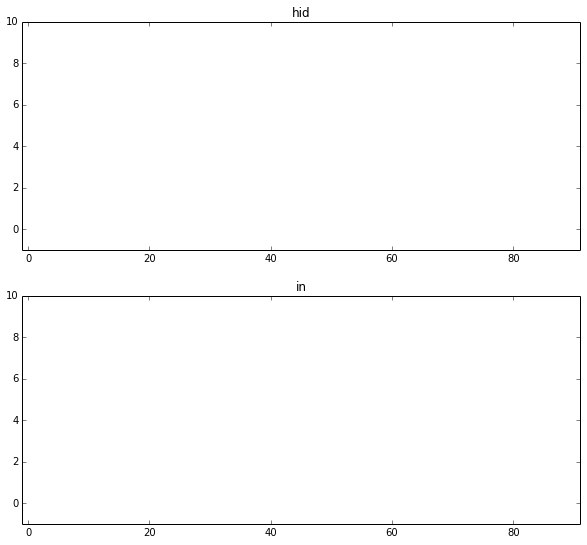

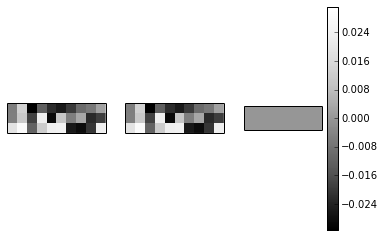

Cycle 5
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


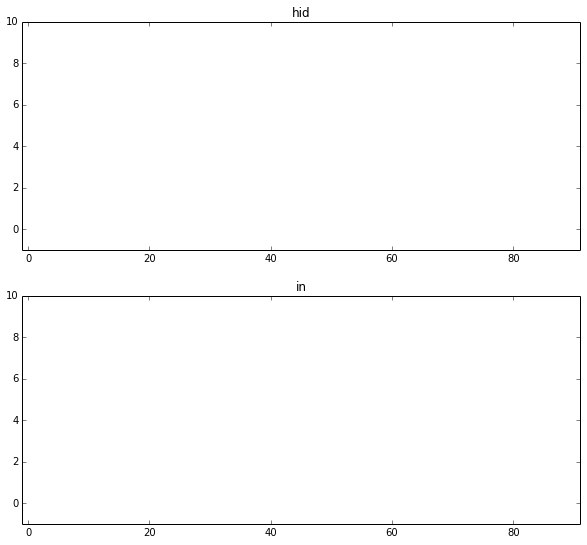

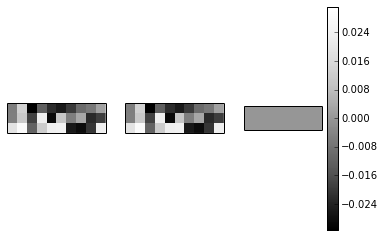

Cycle 6
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


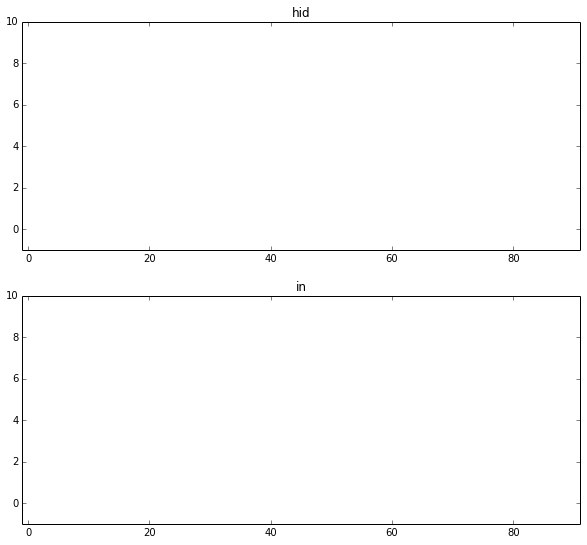

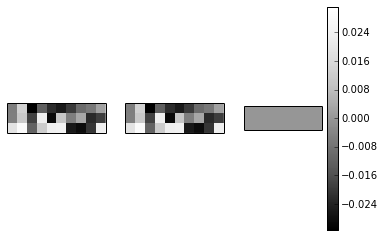

Cycle 7
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


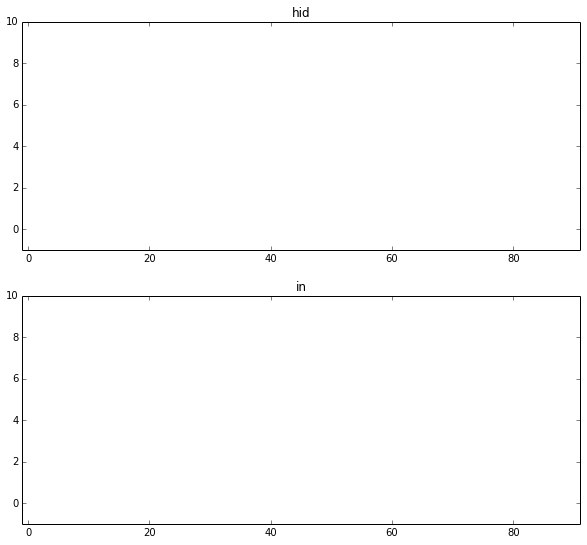

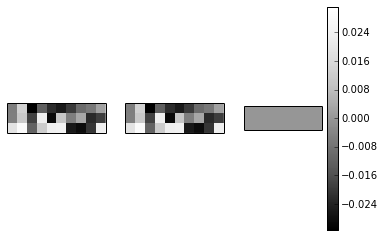

Cycle 8
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


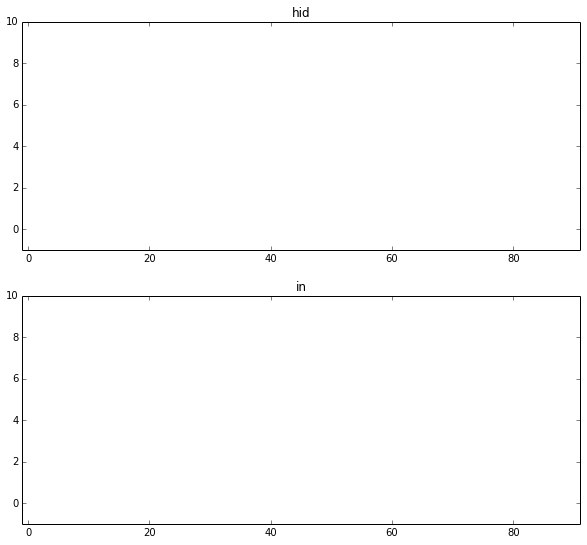

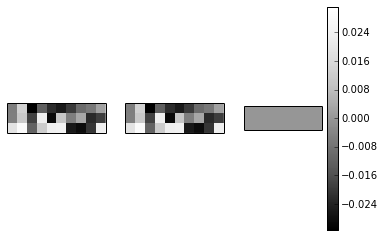

Cycle 9
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


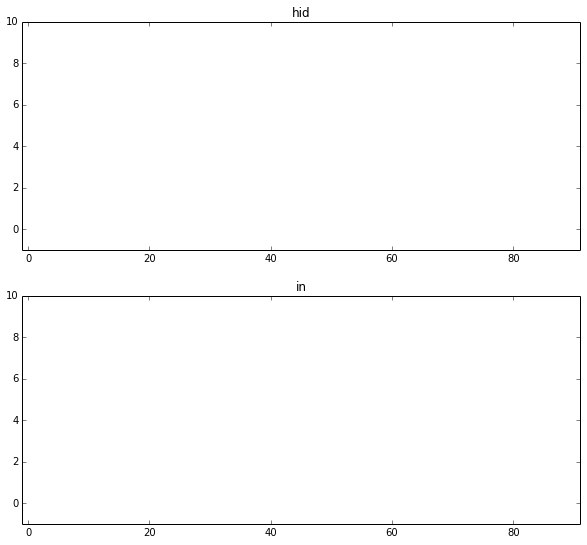

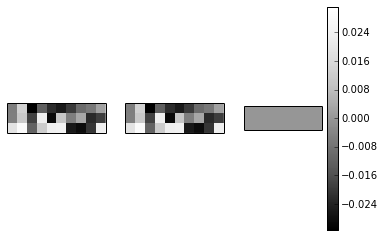

Cycle 10
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


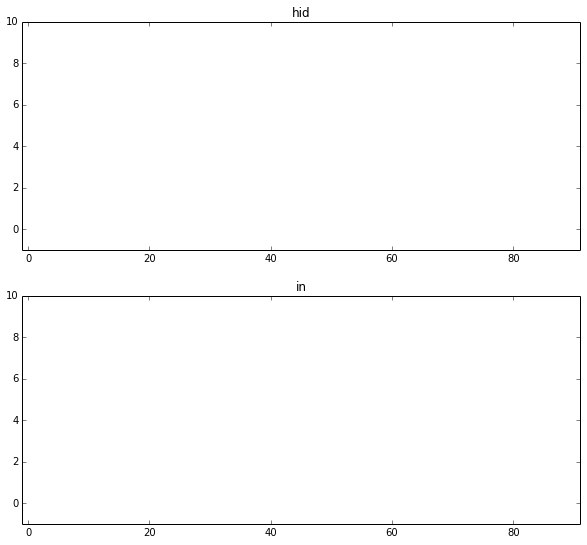

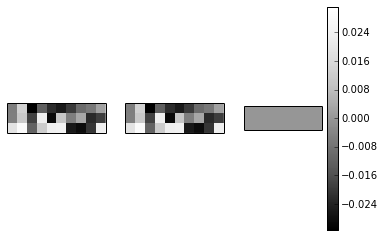

Cycle 11
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


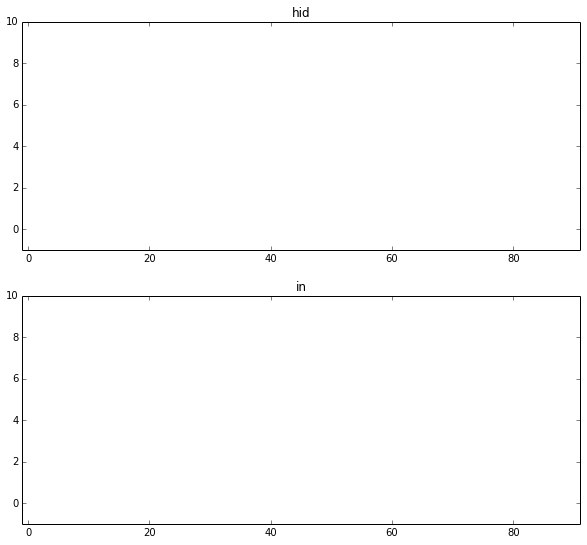

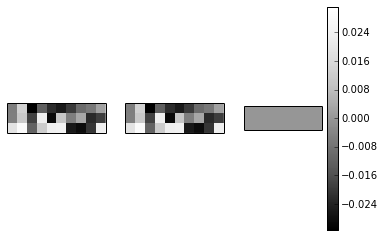

Cycle 12
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


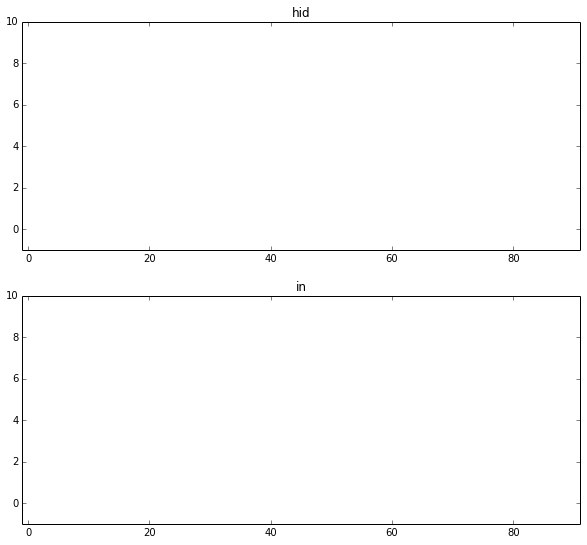

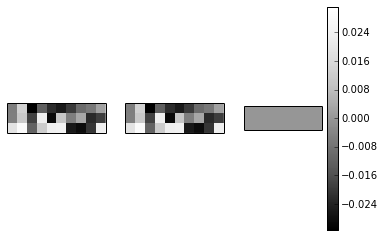

Cycle 13
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


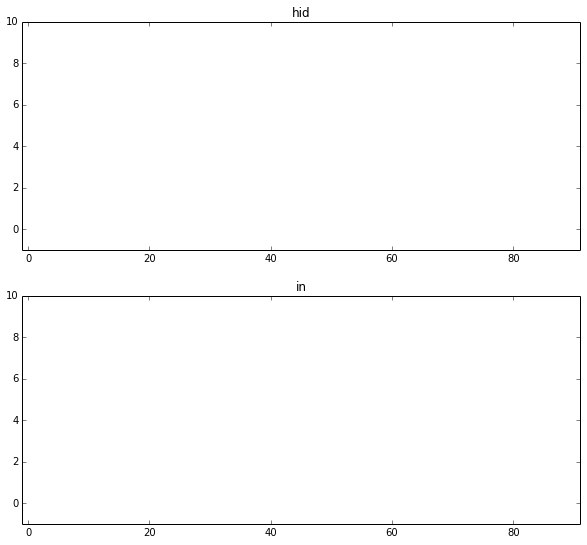

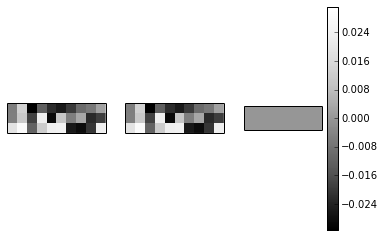

Cycle 14
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


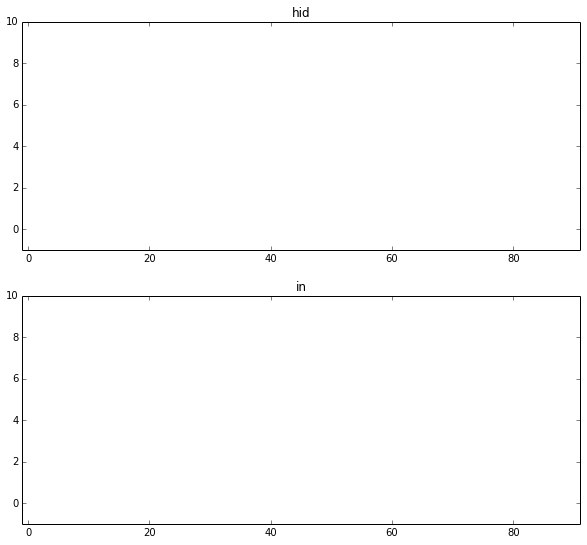

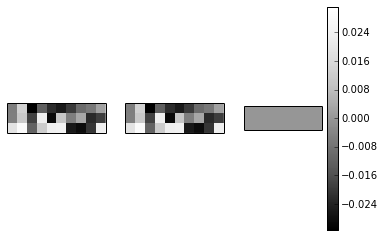

Cycle 15
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


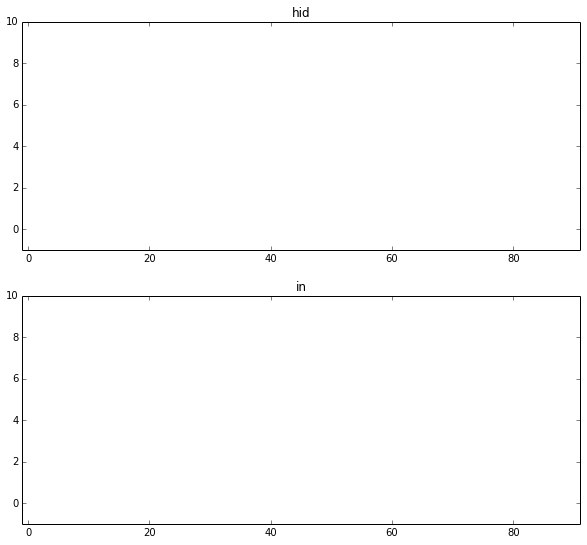

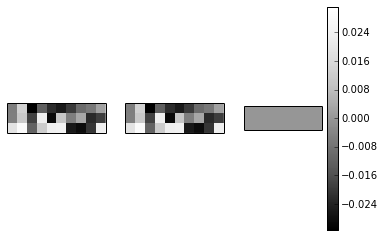

Cycle 16
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


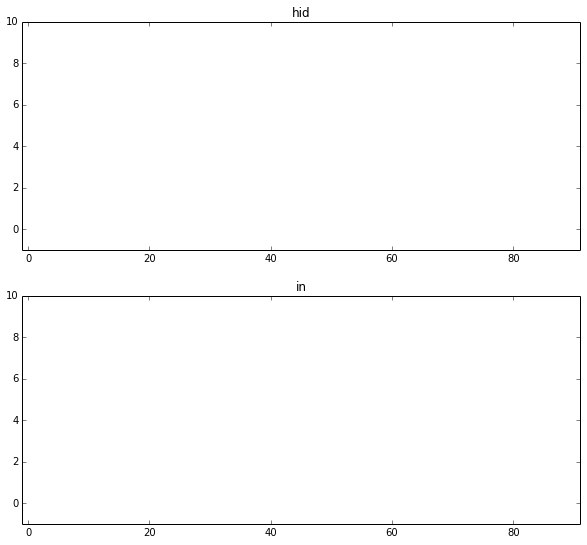

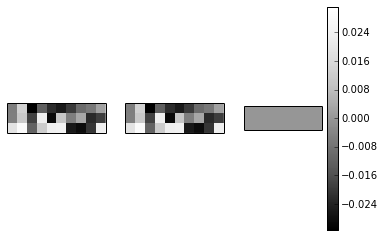

Cycle 17
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


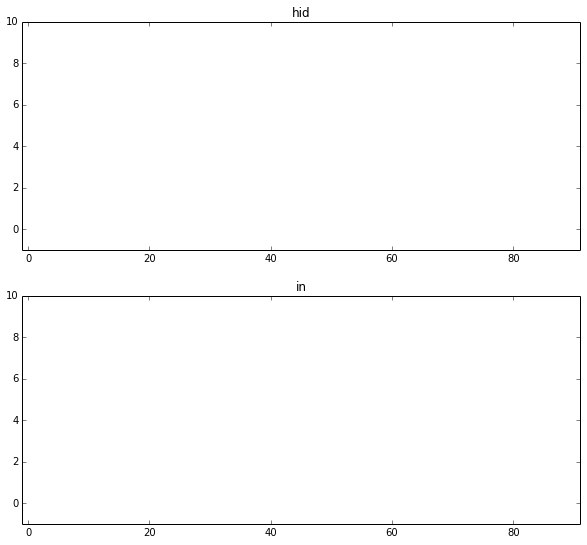

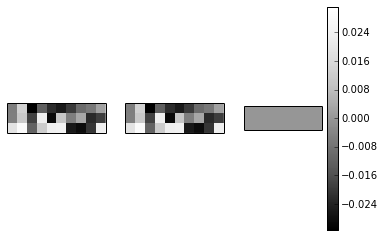

Cycle 18
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


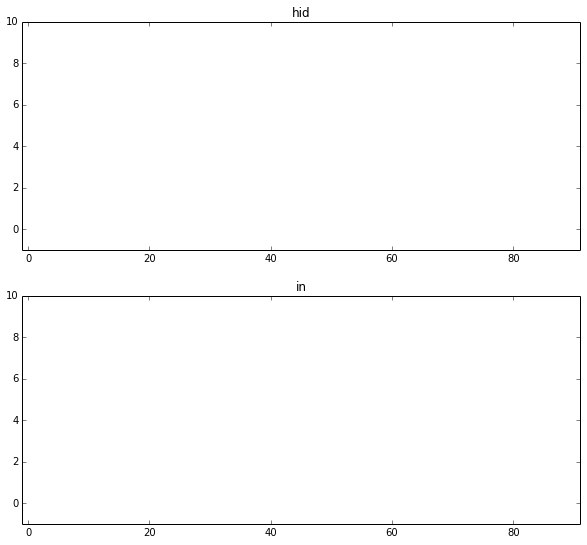

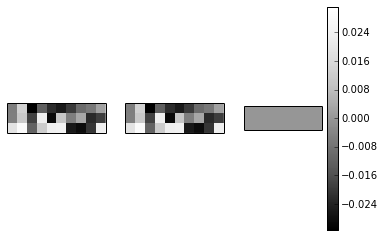

Cycle 19
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


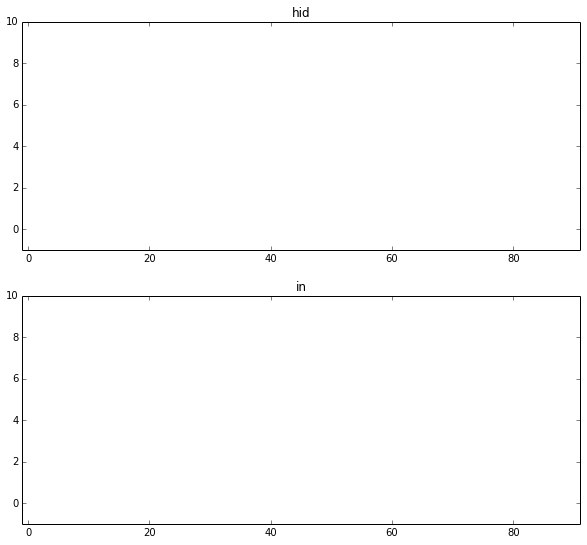

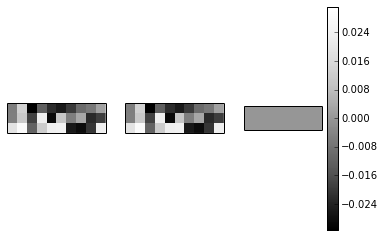

Cycle 20
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


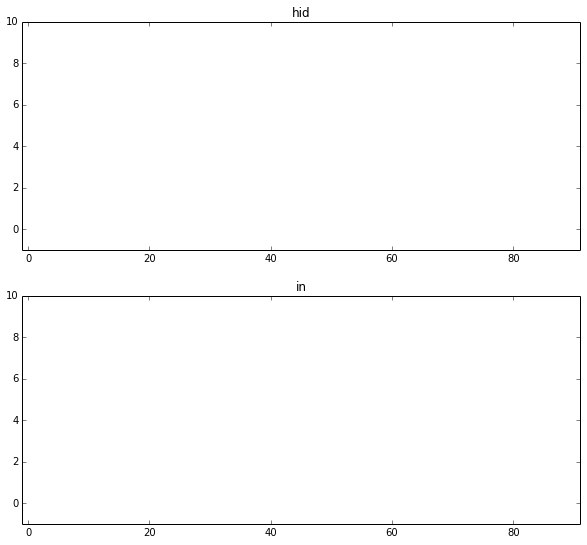

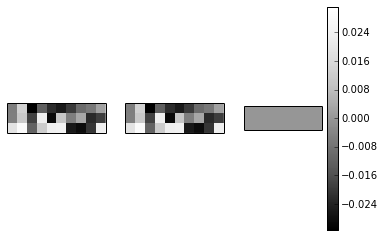

Cycle 21
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


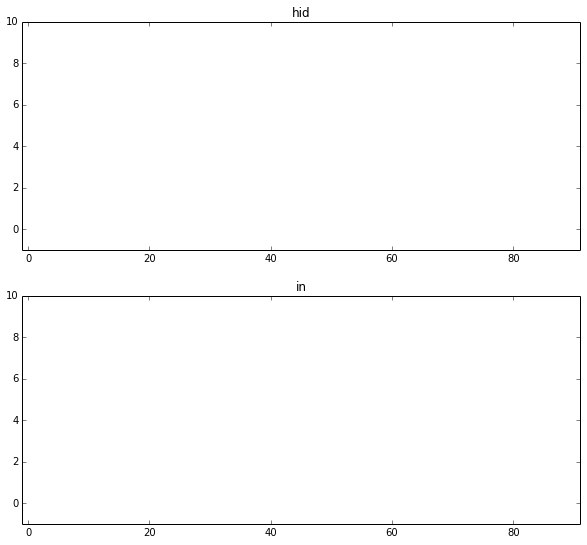

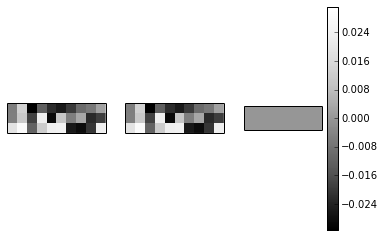

Cycle 22
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


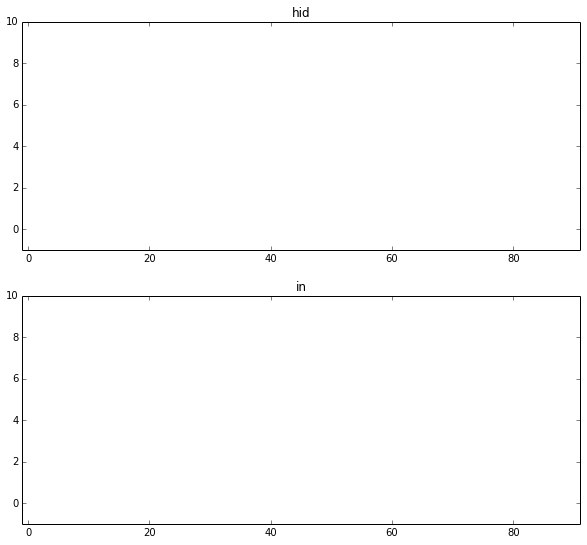

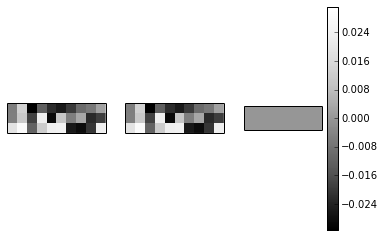

Cycle 23
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


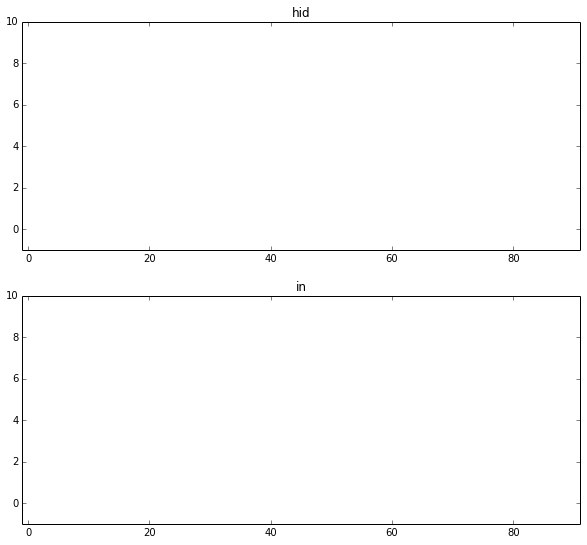

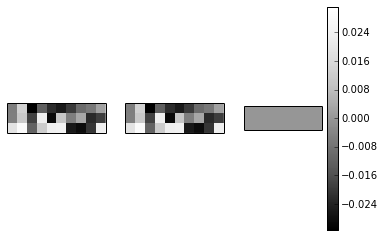

Cycle 24
	populations
	projections
	Running for 90 ms
	Extracting values from sim
		Can't get spikes for pop inh


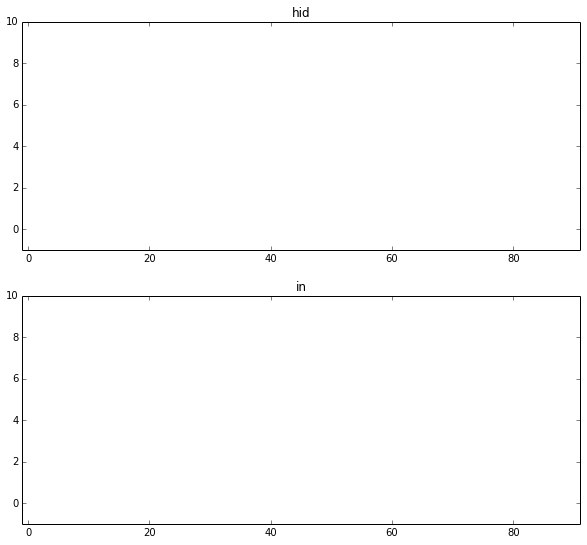

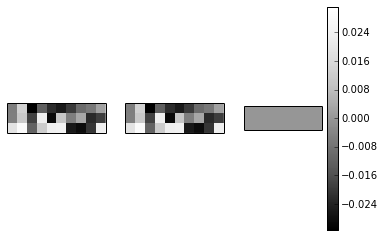

In [5]:
cell = sim.IF_curr_exp
i_offset = 0.#0125
exc_params = { 'cm': 0.35,  # nF
               'i_offset': i_offset,
               'tau_m': 4.0,
               'tau_refrac': 1.0,
               'tau_syn_E': 1.,
               'tau_syn_I': 10.,
               'v_reset': -70.6,
               'v_rest': -65.0,
               'v_thresh': -50.
             }
inh_params = exc_params
# exc_params = { 'cm': 0.2,  # nF
#                'i_offset': i_offset,
#                'tau_m': 10.0,
#                'tau_refrac': 5.0,
#                'tau_syn_E': 2.5,
#                'tau_syn_I': 2.,
#                'v_reset': -70.0,
#                'v_rest': -65.0,
#                'v_thresh': -55.4
#              }
# inh_params = { 'cm': 0.2,  # nF
#                'i_offset': i_offset,
#                'tau_m': 10.0,
#                'tau_refrac': 1.0,
#                'tau_syn_E': 2.5,
#                'tau_syn_I': 15.,
#                'v_reset': -70.0,
#                'v_rest': -65.0,
#                'v_thresh': -55.4
#              }

if sim.__name__ == 'pyNN.spiNNaker':
    sim.set_number_of_neurons_per_core(sim.IF_curr_exp, 100)

num_cycles = 25
ws = w_in2hid.copy()
w_history = []
spikes = {}
for cycle in range(num_cycles):
    print("Cycle %d"%cycle)
    sim.setup(timestep=1., min_delay=1., max_delay=14.)
    print("\tpopulations")
    in_pop, dmy_in, dmy_prj = set_in_pop(sim, single_patt, num_in, w2s=w2s)
    in_pop.record()
    hid_pop = sim.Population(num_hid, cell, exc_params, label='hidden population')
    hid_pop.record()
    inh_pop = sim.Population(num_hid, cell, inh_params, label='hidden-inh population')
#     inh_pop.record()
    pops = {'in': in_pop, 'hid': hid_pop, 'inh': inh_pop}

    print("\tprojections")
    #from Competitive STDP-based spike pattern learning - Masquelier, 2009
    tau_plus = 16.8
    tau_minus = 33.7
    w_min = 0.
    w_max = w2s
    a_plus = 0.03125
    a_minus = -0.85*a_plus
    
    in2hid = std_conn.all2all(num_in, num_hid, ws)
    if sim.__name__ == 'pyNN.spiNNaker':
        timing_dep = q.PiecewiseRule(depression_left_time_thresh = 10,
                                     depression_right_time_thresh = 16,
                                     potentiation_time_thresh = 6,
                                     depression_weight_delta_std = 0.1,
                                     depression_weight_delta_max = 0.1,
                                     potentiation_weight_delta = 1.)
        weight_dep = sim.MultiplicativeWeightDependence(w_min=w_min, w_max=w_max, 
                                                  A_plus=a_plus, A_minus=a_minus,
                                                  )
        stdp = sim.STDPMechanism(timing_dependence=timing_dep,
                                 weight_dependence=weight_dep, mad=False)
        
    else:
        timing_dep = sim.SpikePairRule(tau_plus=tau_plus, 
                                       tau_minus=tau_minus)
        weight_dep = sim.AdditiveWeightDependence(w_min=w_min, w_max=w_max, 
                                                  A_plus=a_plus, A_minus=a_minus)
        stdp=sim.STDPMechanism(timing_dependence=timing_dep,
                               weight_dependence=weight_dep)
    
    syn_dyn = sim.SynapseDynamics(slow=stdp)
    
    in2hid_proj  = sim.Projection(in_pop, hid_pop, sim.FromListConnector(in2hid),
                                  target='excitatory', synapse_dynamics=syn_dyn)
    hid2inh_proj = sim.Projection(hid_pop, inh_pop, sim.FromListConnector(hid2inh),
                                  target='excitatory')
    inh2hid_proj = sim.Projection(inh_pop, hid_pop, sim.FromListConnector(inh2hid),
                                  target='inhibitory')

    run_time = (len(patts) + 1)*twin

    print("\tRunning for %d ms"%run_time)
    sim.run(run_time)
    print("\tExtracting values from sim")
    spikes.clear()
    for k in pops:
        try: 
            spikes[k] = pops[k].getSpikes(compatible_output=True)
        except:
            print("\t\tCan't get spikes for pop %s"%k)
    w_in2hid_out = in2hid_proj.getWeights(format='array', gather=False)
    ws[:] = w_in2hid_out.copy().reshape(num_in*num_hid)
    sim.end()
    plot_sim_spikes(spikes, pops)
    plot_weight_diff(w_in2hid, w_in2hid_out, a_plus, a_minus, w2s)
    w_history.append(w_in2hid_out.copy())